In [6]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)
# irgonre SettingWithCopyWarning
pd.options.mode.chained_assignment = None


cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df = df.groupby('city_country').filter(lambda x: len(x) > 30)
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True, errors='ignore')

In [7]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

/tmp/ipykernel_2230195/2771045691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_true, palette='Greens')
/tmp/ipykernel_2230195/2771045691.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_true, palette='Reds')
/tmp/ipykernel_2230195/2771045691.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_true, palette='Blues')


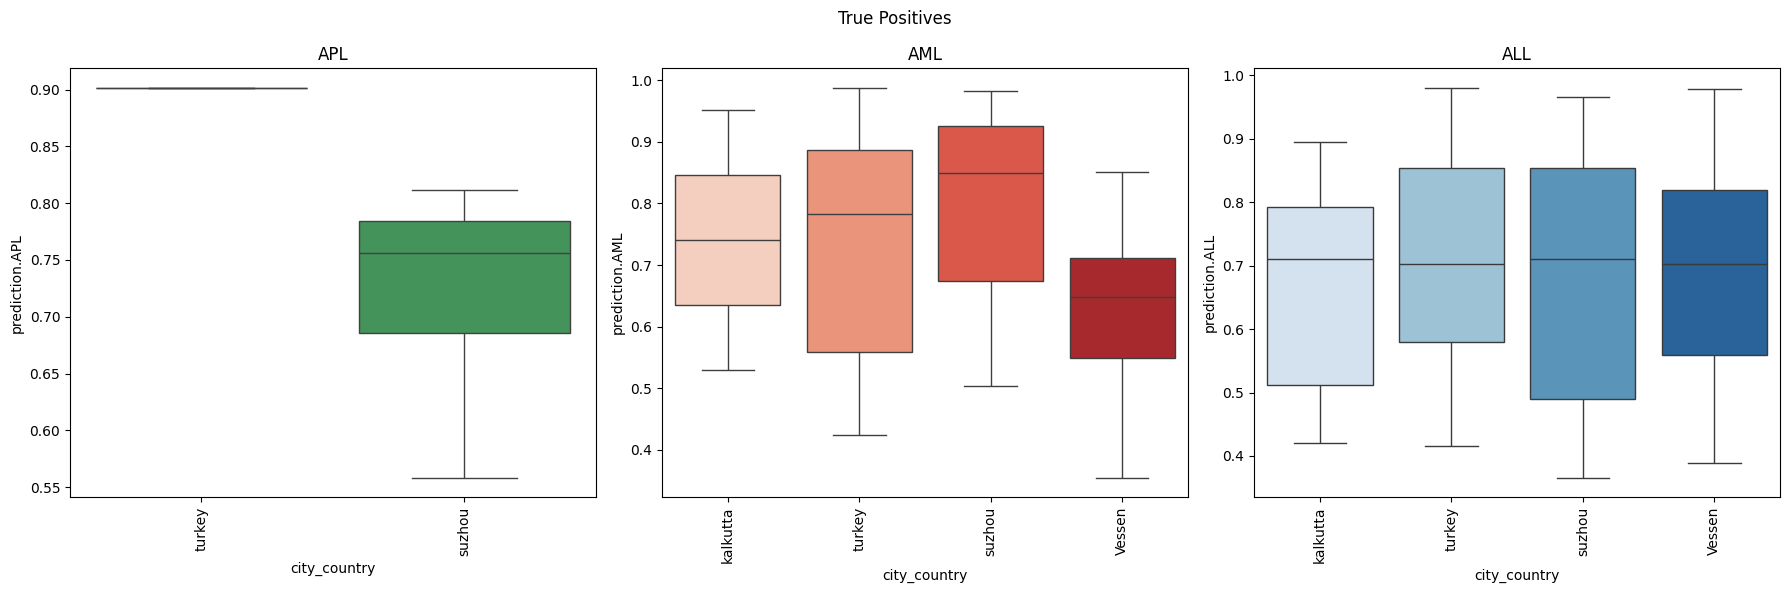

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# APL
apl_true = df_true[df_true['class'] == 'APL']
sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_true, palette='Greens')
axes[0].set_title('APL')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# AML
aml_true = df_true[df_true['class'] == 'AML']
sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_true, palette='Reds')
axes[1].set_title('AML')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# ALL
all_true = df_true[df_true['class'] == 'ALL']
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_true, palette='Blues')
axes[2].set_title('ALL')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Set the overall title
fig.suptitle('True Positives')

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_2230195/184510216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_false, palette='Greens')
/tmp/ipykernel_2230195/184510216.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_false, palette='Reds')
/tmp/ipykernel_2230195/184510216.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_false, palette='Blues')


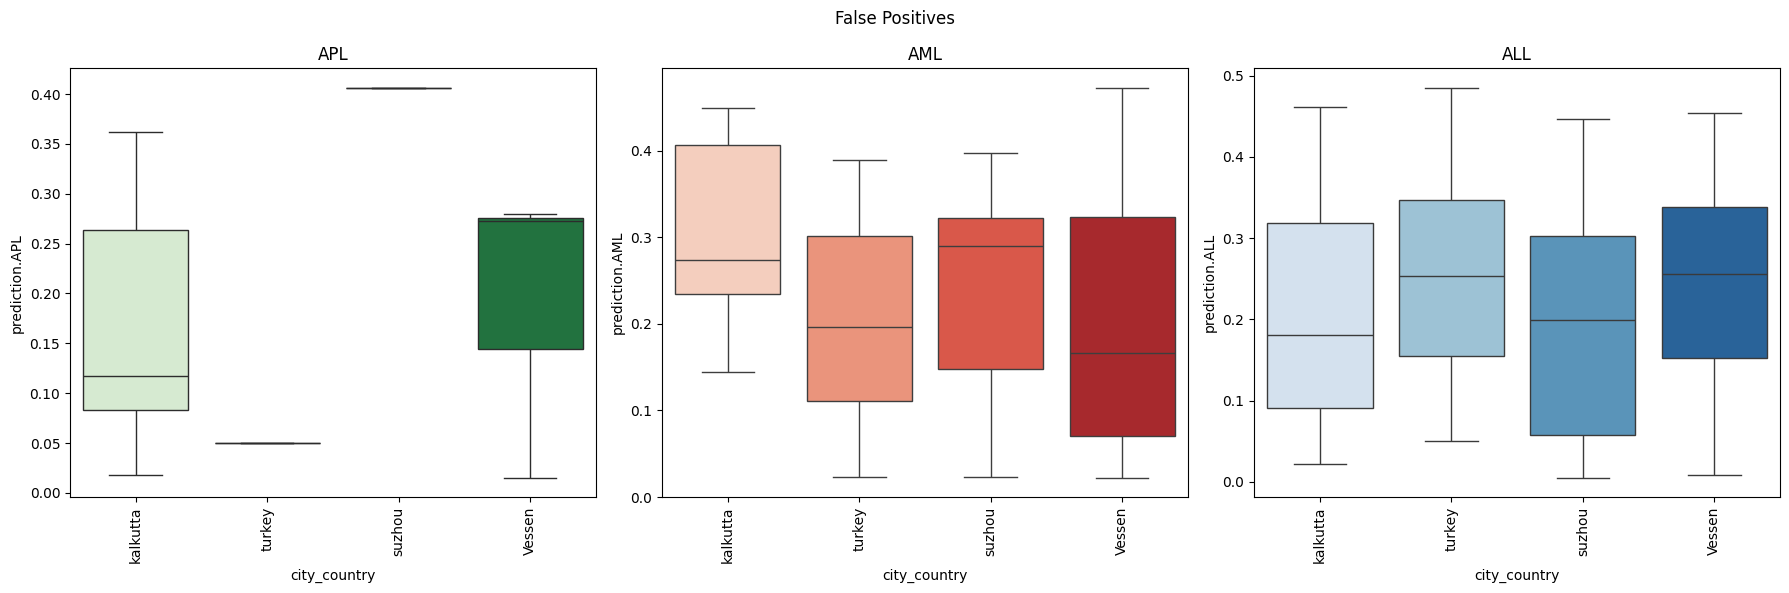

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# APL
apl_false = df_false[df_false['class'] == 'APL']
sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_false, palette='Greens')
axes[0].set_title('APL')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# AML
aml_false = df_false[df_false['class'] == 'AML']
sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_false, palette='Reds')
axes[1].set_title('AML')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# ALL
all_false = df_false[df_false['class'] == 'ALL']
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_false, palette='Blues')
axes[2].set_title('ALL')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Set the overall title
fig.suptitle('False Positives')

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()